1.5 ウォーミングアップ

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

平均は: 1000.934029031269
合計は: 2001868.058062538
合計を総数で割ると 1000.934029031269
各値の2乗の合計は 2023488949.4917781
センタリングの2乗の合計は 19751088.54623924


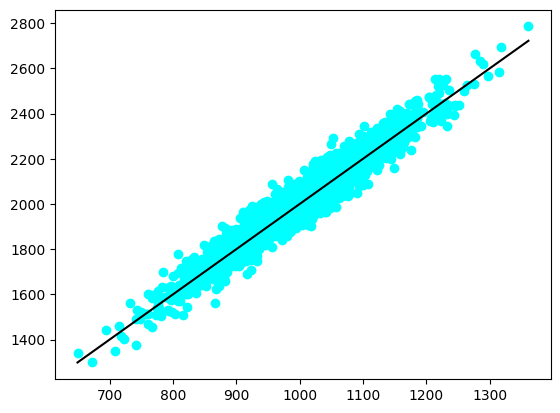

In [2]:
np.random.seed(seed = 5)

x = np.random.normal(1000, 100, 2000)
print("平均は:", np.mean(x))
print("合計は:", np.sum(x))

print("合計を総数で割ると", np.sum(x) / 2000)
print("各値の2乗の合計は", np.sum(x**2))

print("センタリングの2乗の合計は", np.sum((x - np.mean(x)) ** 2))

y = 2 * x + np.random.normal(10, 50, 2000)
plt.scatter(x, y, c='cyan')

xp = np.linspace(np.amin(x), np.amax(x), 100)
plt.plot(xp, 2*xp, c = 'black')

plt.show()

1.6

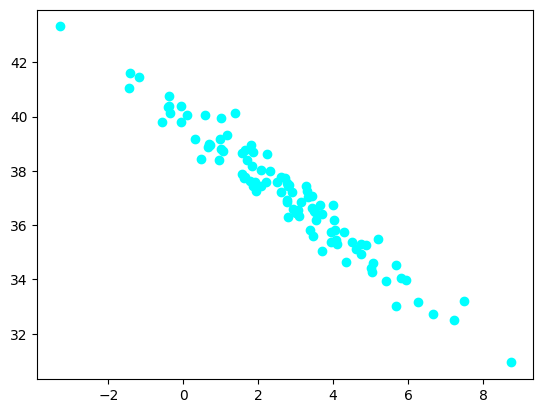

In [3]:
np.random.seed(seed = 12)
x_data = np.random.normal(3, 2, 100)
y_data = 40 - x_data + np.random.normal(0, 0.5, 100)

plt.scatter(x_data, y_data, c = 'cyan')
plt.show()

決定係数（R²）は、モデルがデータの分散をどれだけ説明できるかを示す指標です。x_dataの標準偏差を大きくすると、x_dataの値の範囲が広がり、y_dataとの関係がより明確になる可能性があります。これにより、モデルがデータの分散をよりよく説明できるようになり、結果として決定係数が大きくなることがあります。

具体的な理由は以下の通りです：

1. **データの分散の増加**: x_dataの標準偏差が大きくなると、データポイントがより広範囲に分布します。これにより、y_dataとの関係がより明確に見えるようになります。

2. **モデルの適合度の向上**: x_dataの範囲が広がることで、回帰モデルがデータの傾向をより正確に捉えることができるようになります。これにより、モデルの適合度が向上し、決定係数が大きくなります。

3. **ノイズの影響の相対的な減少**: x_dataの標準偏差が大きくなると、y_dataに対するノイズの影響が相対的に小さくなります。これにより、モデルがデータの本質的な関係をよりよく捉えることができるようになります。

このように、x_dataの標準偏差を大きくすることで、データの分散が増加し、モデルがデータの関係をより正確に捉えることができるため、決定係数が大きくなることがあります。

y_dataとの関係がより明確になる」というのは、次のようなことを指しています：  

x_data が広い範囲で変化することで、x_data と y_data の間の相関や傾向がよりはっきり見えるようになる。
これにより、モデルは y_data の変動を説明しやすくなり、決定係数が大きくなる可能性がある。
データの分布が広がることで、相関関係やトレンドがより顕著になり、モデルがデータのパターンを捉えやすくなるため、y_data との関係が「明確」になると表現しています。

In [4]:
from scipy import stats
result = stats.linregress(x_data, y_data)
print(result)
print("決定係数:", result.rvalue ** 2)

LinregressResult(slope=np.float64(-1.028821660982986), intercept=np.float64(39.97002482035558), rvalue=np.float64(-0.97308930743824), pvalue=np.float64(2.7882552138830743e-64), stderr=np.float64(0.024609918189610624), intercept_stderr=np.float64(0.08427831090020434))
決定係数: 0.9469028002506334


決定係数が約0.95なので，この回帰直線は平均値では予測できなかった観測のうち，約95%を予測できていると解釈できる．

>決定係数：  
観測値の変動のうち予測値の変動が占める割合  
モデルがどれだけ精度よく観測値を予測できているかを表す指標

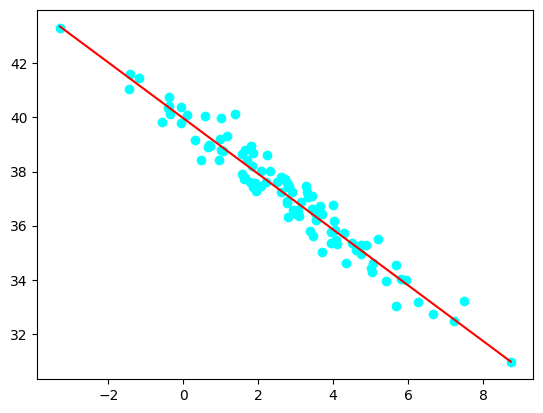

In [5]:
# 回帰直線を描画する
a = result.slope
b = result.intercept

def regline(x):
    return a * x + b

xp = np.linspace(np.amin(x_data), np.amax(x_data), 100)
fit = regline(xp) # 回帰直線上の点（予測値）

plt.scatter(x_data, y_data, c = 'cyan')
plt.plot(xp, fit, c = 'red')

plt.show()

In [6]:
from sklearn.metrics import r2_score

print("r2_score:", r2_score(y_data, regline(x_data)))

r2_score: 0.9469028002506336


In [7]:
x = [-1, 1, 3, 5]
y = [2, 3, 1, 2]

def regline_1(x):
    return x

def regline_2(x):
    return -0.1 * np.array(x) + 2.2

print("r2_score:", r2_score(y, regline_1(x)))
print("r2_score:", r2_score(y, regline_2(x)))

r2_score: -12.0
r2_score: 0.09999999999999987


regline_1 は、y の値そのものを返すだけのもので、x を全く使用していません。そのため、データの傾向をまったく説明できず、非常に低い（負の）R²が得られました。  
regline_2 は、x を使用して回帰直線を引いていますが、その回帰直線はデータの変動を十分には捉えられていません。結果として、R² は 0.1 と非常に低く、モデルの性能が低いことを示しています。

1.7

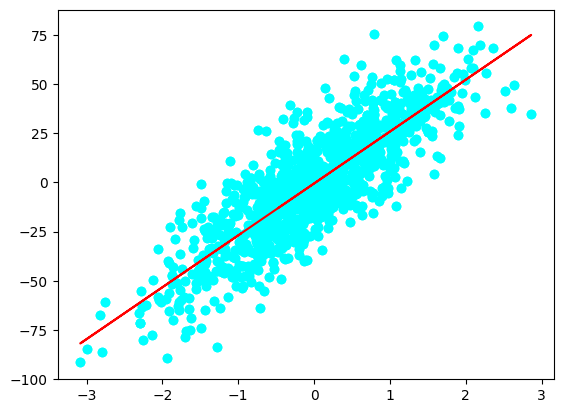

決定係数(mycd): 0.7133795045886714
決定係数(r2_score): 0.7133795045886714


In [6]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# サンプル数1000、説明変数1つ、ガウシアンノイズの標準偏差16.0の回帰デーサンプルを生成
x_data, y_data = make_regression(n_samples=1000, n_features=1, noise=16.0, random_state=7)
x_data = x_data.flatten() # 1次元配列に変換

plt.scatter(x_data, y_data, c='cyan')

# 線形単回帰を定義
def mylinregress(x, y):
    sum_de = np.sum((x - np.mean(x)) ** 2)
    sum_nu = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    a = sum_nu / sum_de
    b = np.mean(y) - a * np.mean(x)
    return a, b

# 回帰直線を定義
def myregline(x_data, a, b):
    return a * x_data + b

# 決定係数を定義
def mycd(y, y_pred):
    sse = np.sum((y - y_pred) ** 2)  # 残差平方和SSE
    sst = np.sum((y - np.mean(y)) ** 2)  # 全平方和SST
    return 1.0 - sse / sst

# 線形単回帰分析を実行
a, b = mylinregress(x_data, y_data)

xp = np.linspace(np.amin(x_data), np.amax(x_data), 100)
fit = myregline(xp, a, b) # 回帰直線上の点（予測値）

# x_data に基づく予測値を計算
y_pred = myregline(x_data, a, b)

plt.scatter(x_data, y_data, c = 'cyan')
plt.plot(x_data, y_pred, c = 'red')
plt.show()

# 決定係数の表示
print("決定係数(mycd):", mycd(y_data, y_pred))
print("決定係数(r2_score):", r2_score(y_data, y_pred))

<details><summary> fitとy_predの違い </summary>
`fit` と `y_pred` の違いは、**それぞれの用途**や**計算されるデータの対象**によって生じます。以下でその違いを詳しく解説します。

### 1. **`fit` とは？**
`fit` は、`xp` という等間隔の100点に対して計算された回帰直線上の予測値です。

#### 具体的な用途：
- **回帰直線を描画するため**に使われます。`xp` はデータ範囲内で等間隔に生成された100個の点なので、これに対する `fit` は **回帰直線を滑らかにプロットするためのもの**です。
- **`xp` は描画用**に使っており、これ自体はデータに含まれていない等間隔の点です。したがって、`fit` は描画目的の予測値で、実際の `x_data` ではありません。

#### 例：
```python
xp = np.linspace(np.amin(x_data), np.amax(x_data), 100)
fit = myregline(xp, a, b)  # 描画用の回帰直線
```
この `fit` は、元の `x_data` とは異なる100個の点 `xp` に対する回帰直線の値です。`fit` は可視化に使われるものの、**決定係数などのモデル評価には使いません**。

### 2. **`y_pred` とは？**
`y_pred` は、元のデータ `x_data` に基づく **予測値** です。

#### 具体的な用途：
- `x_data` に対して回帰モデルが予測した値です。これにより、元のデータとの誤差を計算してモデルの評価（決定係数 R²）を行います。
- **モデルの性能評価や予測に使う**値です。実際に回帰モデルを使って `x_data` に対する予測を行い、その予測結果が `y_pred` に入ります。

#### 例：
```python
y_pred = myregline(x_data, a, b)  # 元のデータに対する予測値
```
この `y_pred` は、元の `x_data` に対して計算された予測値であり、**決定係数の計算**やモデルの性能評価に使います。

### まとめ：
- **`fit`**：等間隔に生成した100点 `xp` に対する回帰直線上の予測値。これは主に **グラフ描画用**です。
- **`y_pred`**：元のデータ `x_data` に対する回帰モデルの予測値。これは **モデルの性能評価や予測**に使います。

### 使い分け：
- **グラフ描画** では `xp` と `fit` を使って、回帰直線を可視化します。
- **モデル評価** では `y_pred` を使って、元のデータとの誤差を計算し、決定係数などを求めます。